### Advanced Machine Learning

# Home Exercise #1

Assignment Due: 21/03/21 23:59

Jonathan Schler


In [1]:
student1Name="Matan Mizrachi" # student1 name here
student1ID="207299363" # student1 ID here


student2Name="Ron Yosef" # student2 name here
student2ID="" # student2 ID here


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.neighbors import NearestCentroid
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
plt.style.use('seaborn')
%matplotlib inline

## Task 1 Regression on Ames Housing Dataset (60 Points)

You can load the Ames housing dataset from <br>
http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls <br>
You can find a description of the variables here: <br>
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt <br>
Take note that for categorical variables, NA here does not mean a missing value, but should be treated as a separate category.

In [2]:
df = pd.read_excel("AmesHousing.xls")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Question 1.1
Visualize the univariate distribution of each continuous attribute, and the distribution of the target. Make sure you skip the string\categorial columns (you can do it using call to `select_dtypes(exclude=['object'])`).

Do you notice anything? Is there something that might require special treatment?

In [3]:
to_plot = df.select_dtypes(exclude=['object']).copy()
to_plot.drop(columns=['Order', 'PID', 'MS SubClass'], inplace=True)
cols = to_plot.columns.to_list()
cols.remove('SalePrice')

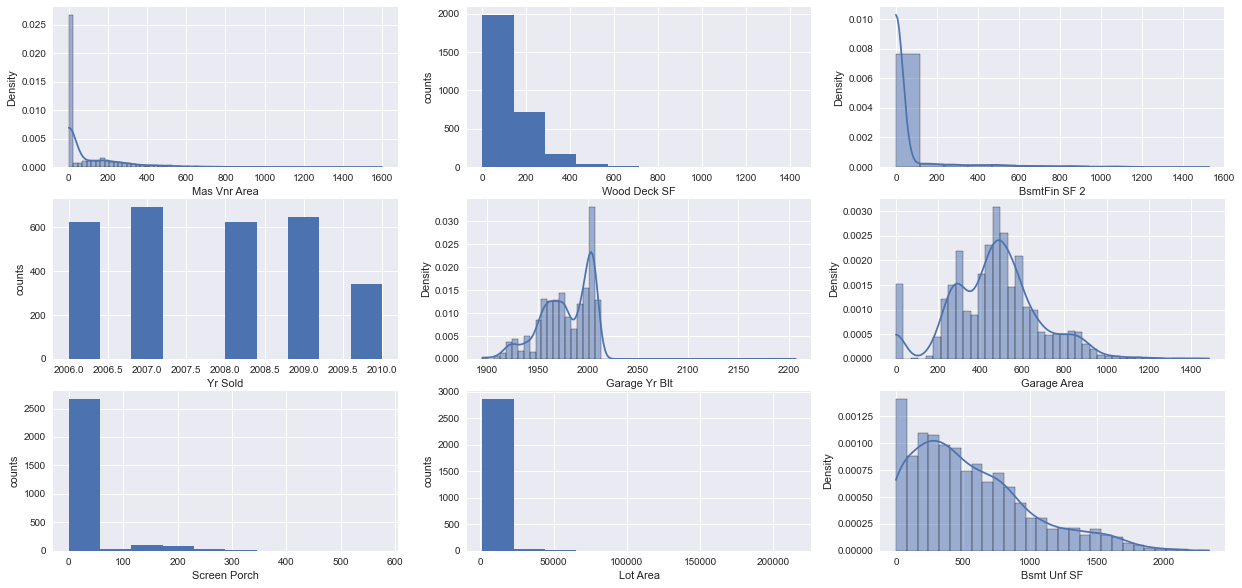

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

plt.show()

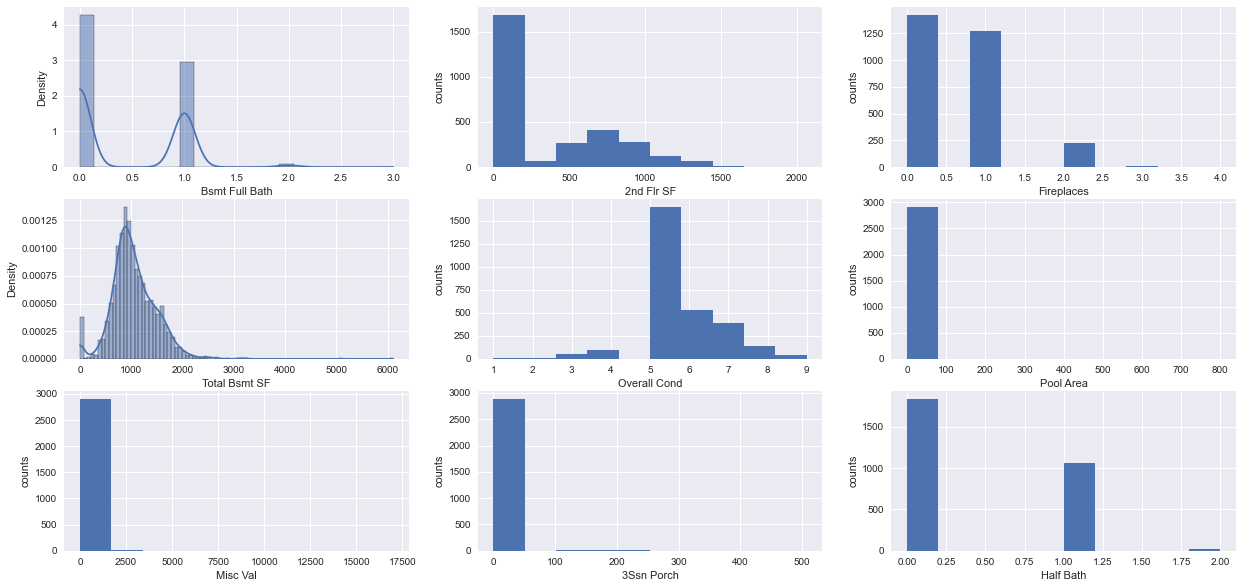

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

plt.show()


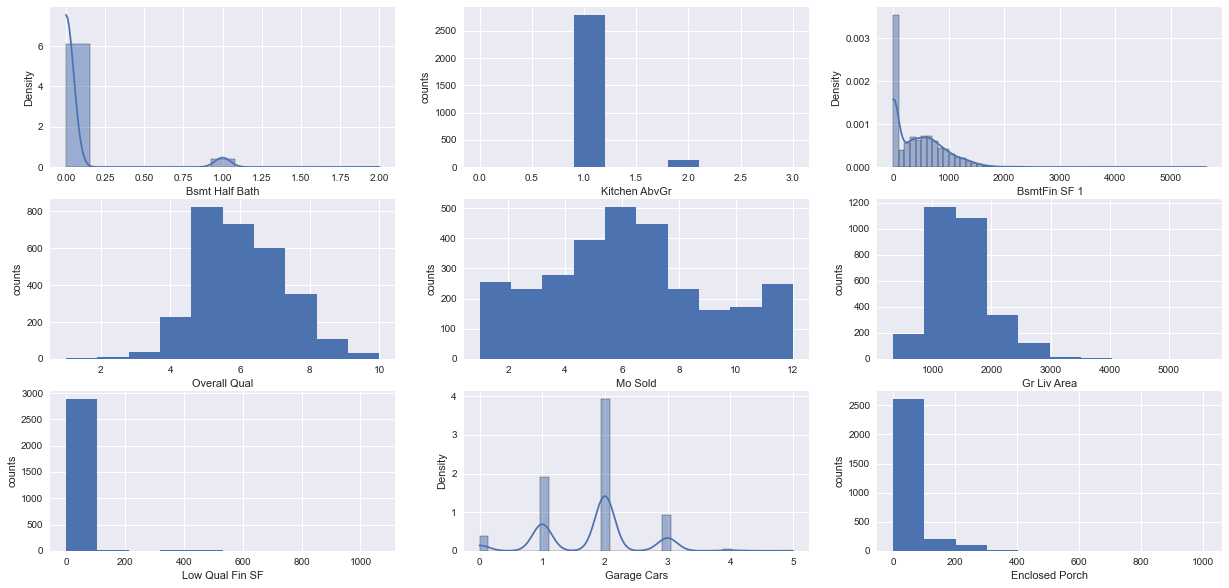

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

plt.show()

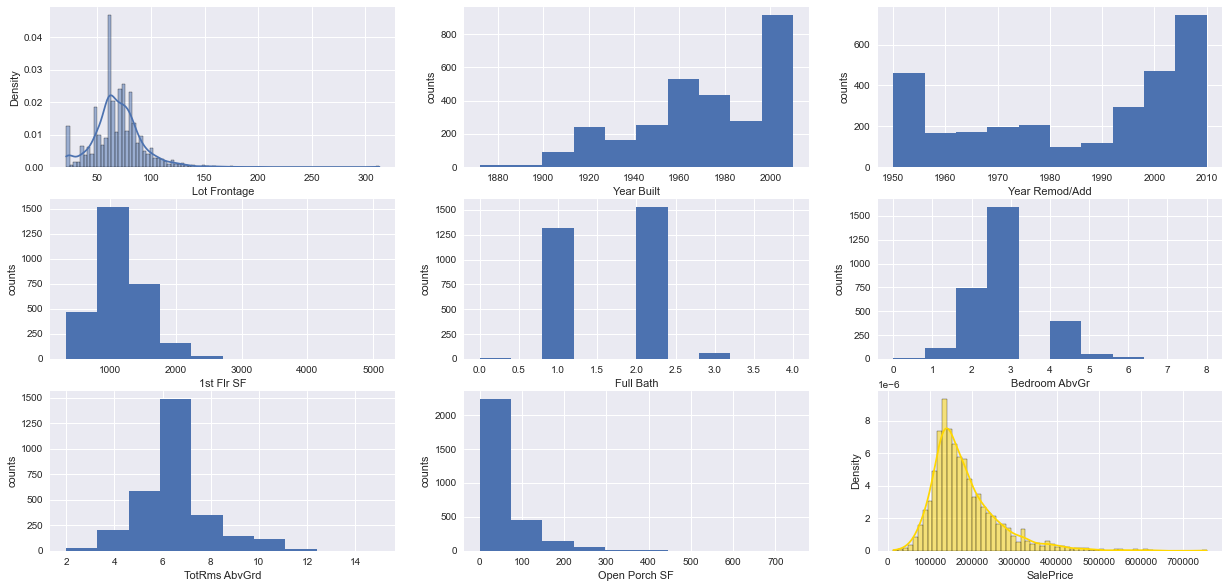

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
for i, col in enumerate(cols):
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

sns.histplot(data=df, x='SalePrice', discrete=False, ax=axes[2, 2], kde=True, stat='density', color='gold')
plt.show()

### Answer 1.1
1. Some of the "Continues" variables are, in fact, discrete. Moreover, we might actually would like to turn those into
categorical variables, since these doesn't hold much unique values. For an example, check out the 'Garage Cars' variable's
"density" plot.

2. Many of the variables are varying on large scales, so it is clear that we'd like to normalize them further ahead.

3. Some variables might require a special treatment for their outliers.

### Question 1.2
Visualize the dependency of the target on each continuous feature (2d scatter plot).

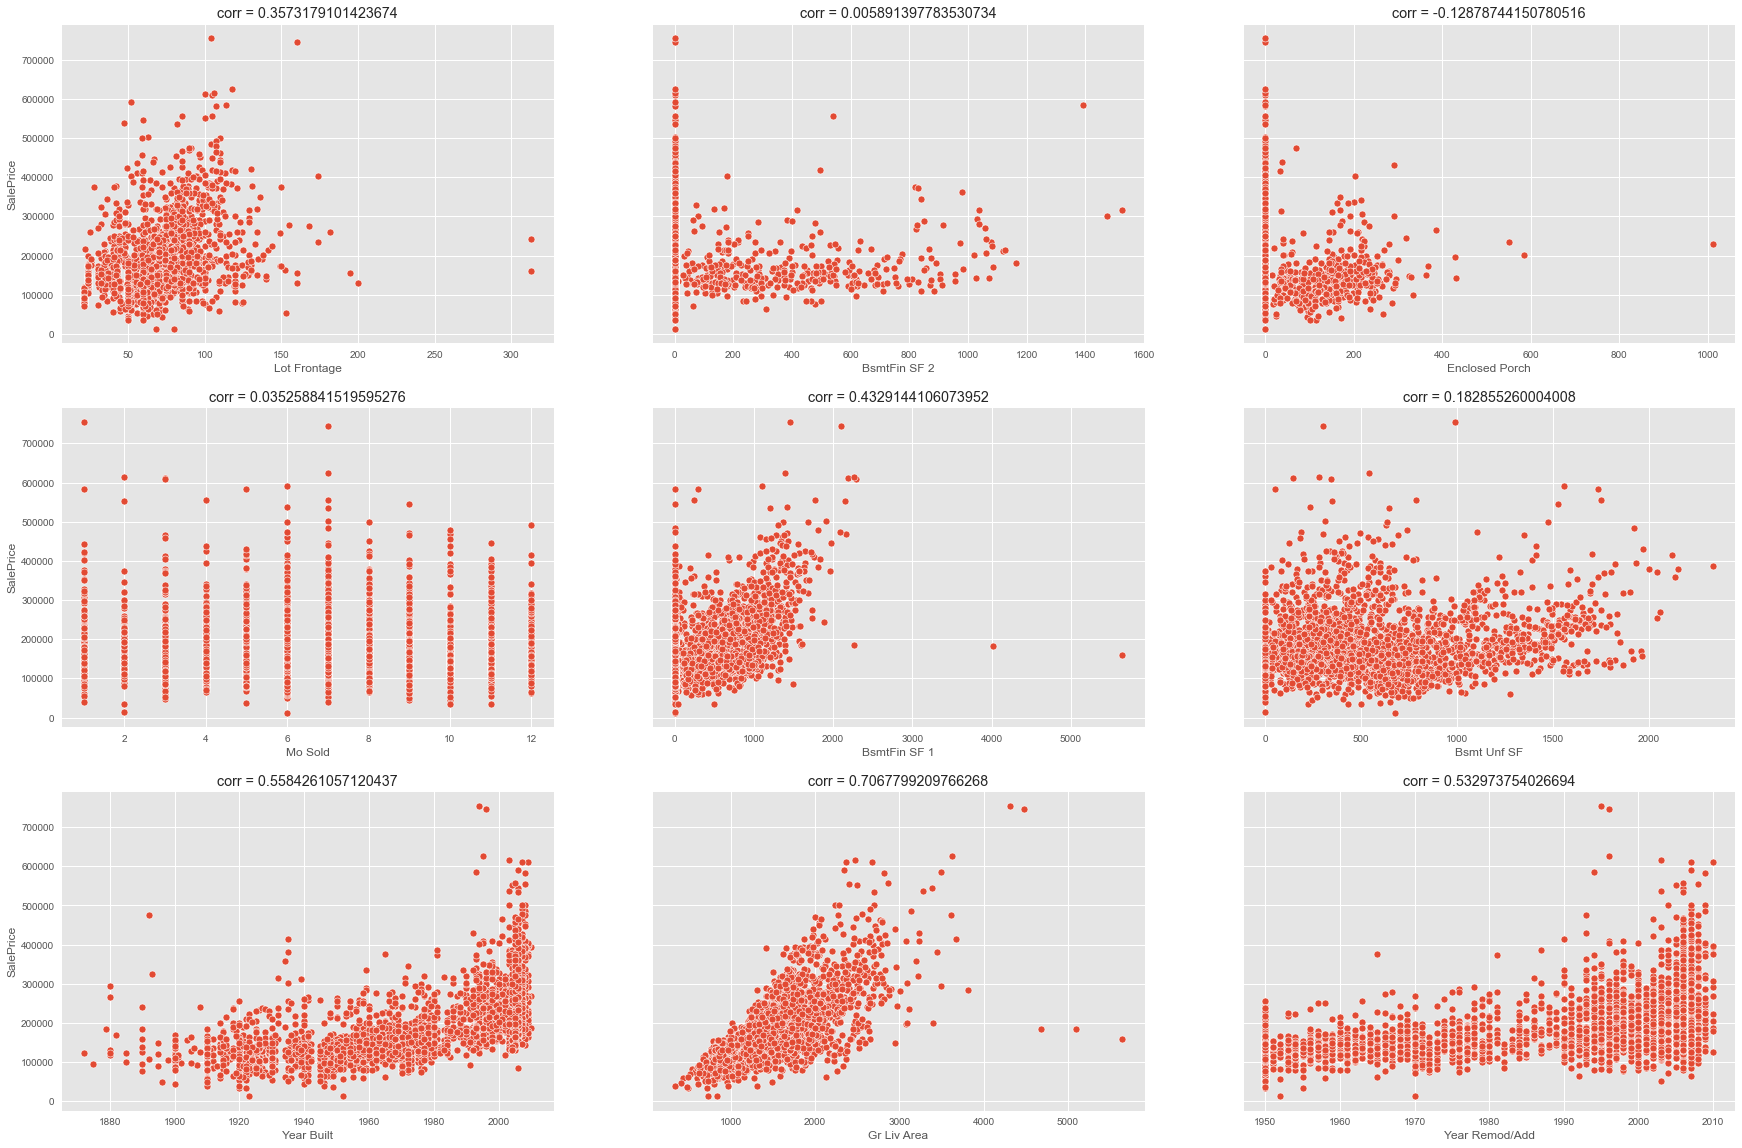

In [24]:
plt.style.use('ggplot')
corr = to_plot.corr()

cols = to_plot.columns.to_list()
cols.remove('SalePrice')
fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    axes[i//3,i%3].set_title(f'corr = {corr.loc[col, "SalePrice"]}')
    sns.scatterplot(x=col, y="SalePrice", data=to_plot, ax=axes[i//3,i%3])

plt.show()

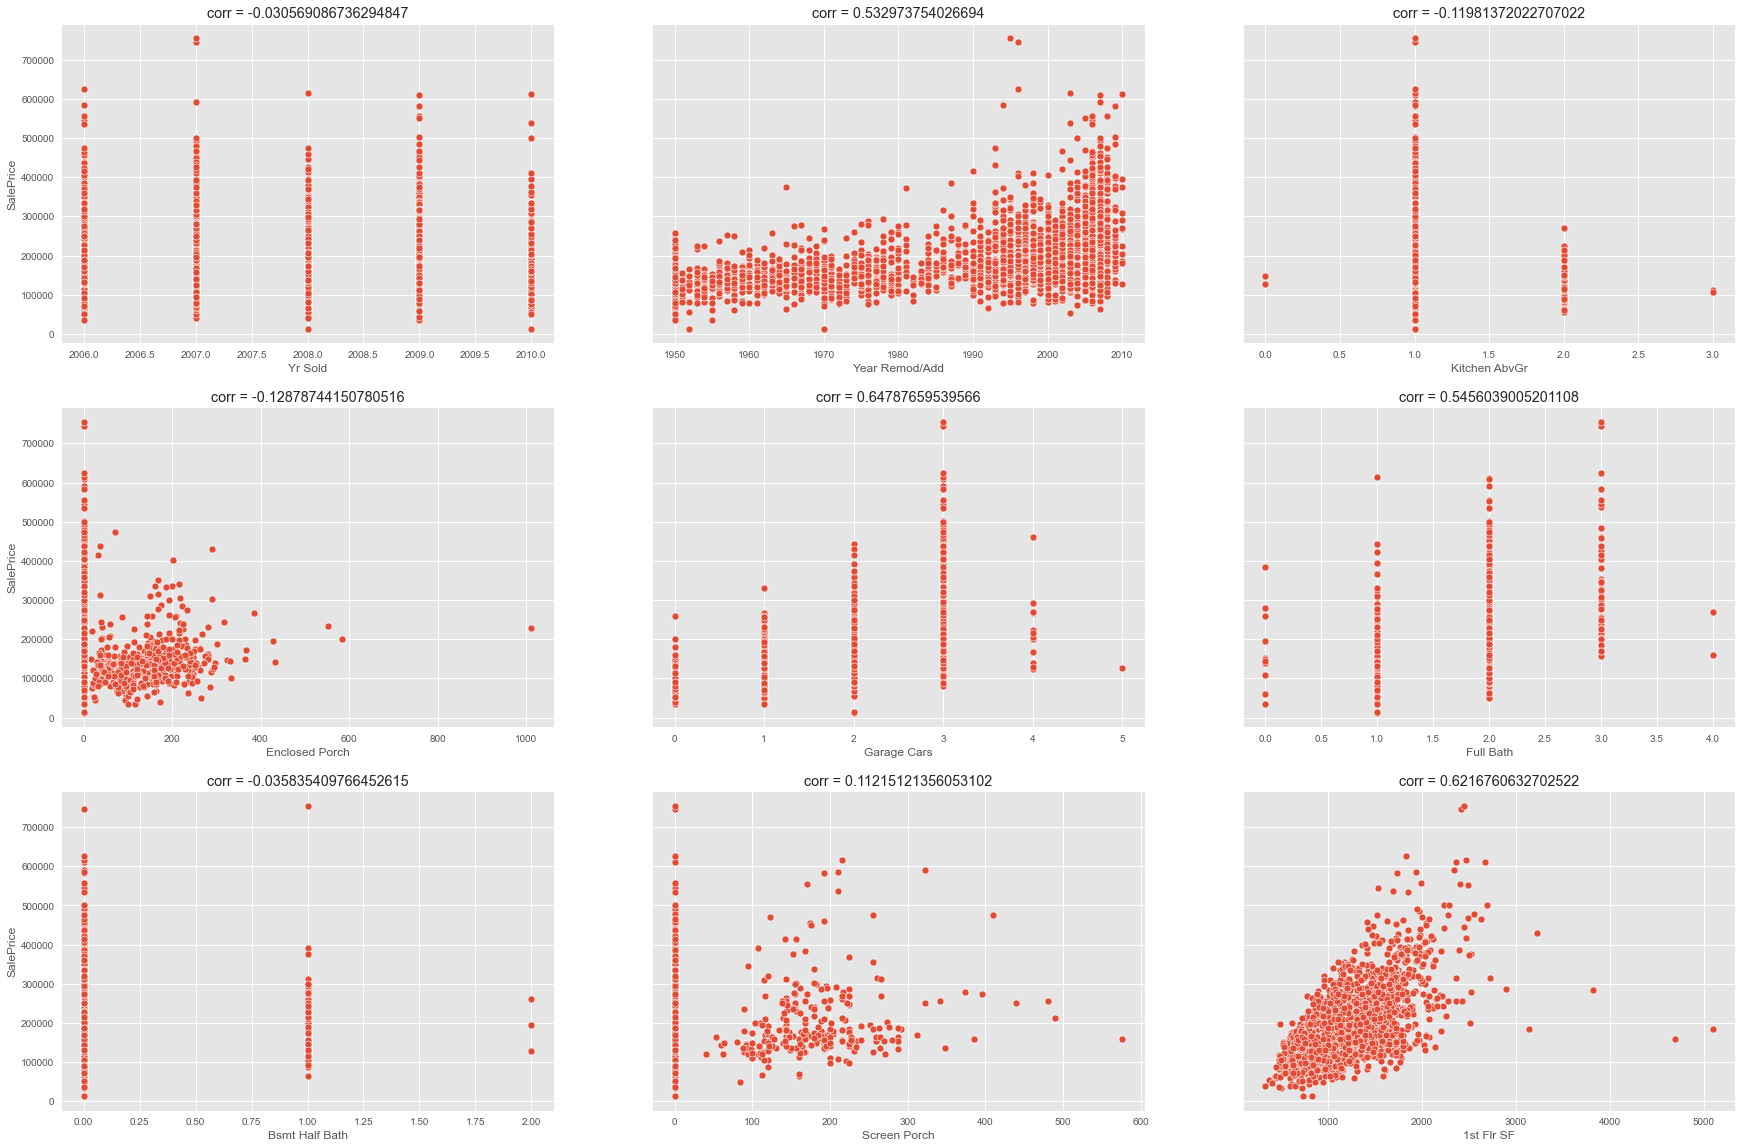

In [25]:
cols = to_plot.columns.to_list()
cols.remove('SalePrice')
fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    axes[i//3,i%3].set_title(f'corr = {corr.loc[col, "SalePrice"]}')
    sns.scatterplot(x=col, y="SalePrice", data=to_plot, ax=axes[i//3,i%3])

plt.show()

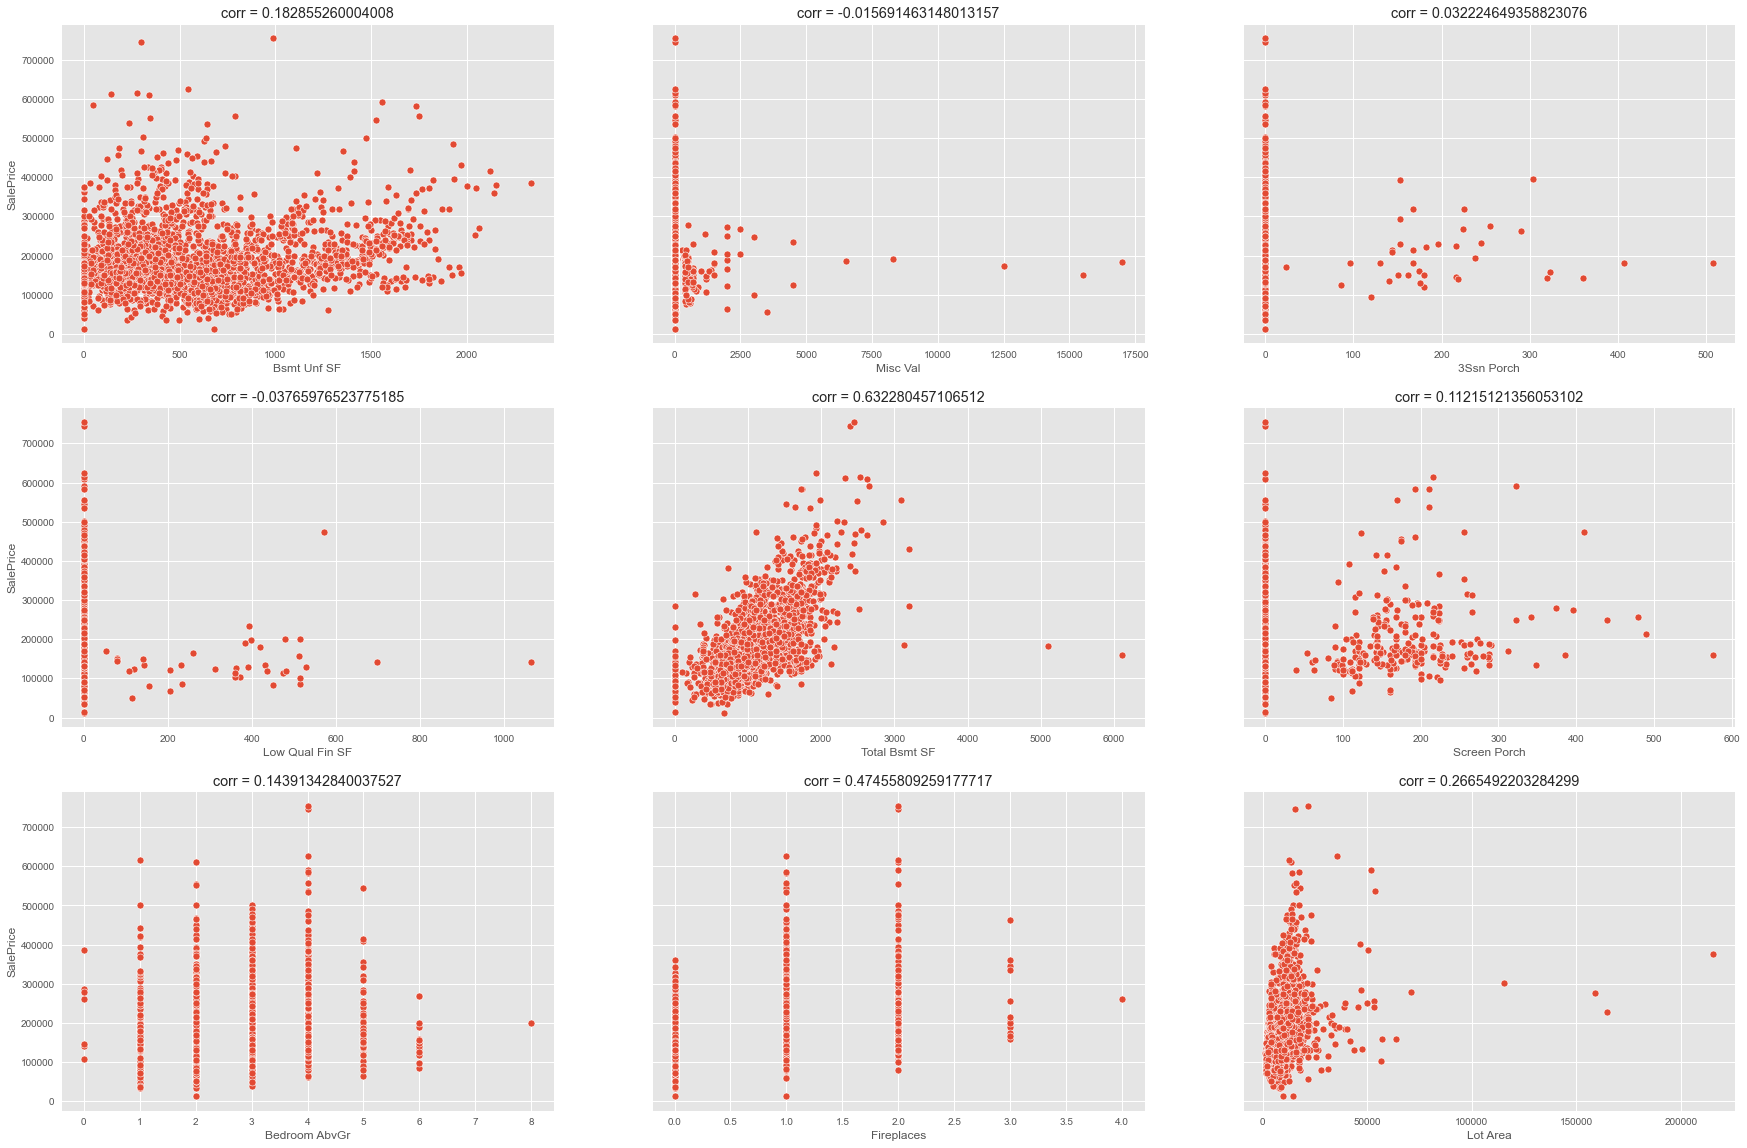

In [26]:
cols = to_plot.columns.to_list()
cols.remove('SalePrice')
fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    axes[i//3,i%3].set_title(f'corr = {corr.loc[col, "SalePrice"]}')
    sns.scatterplot(x=col, y="SalePrice", data=to_plot, ax=axes[i//3,i%3])

plt.show()

### Question 1.3
Split data in training and test set. Do not use the test-set unless for a final evaluation in 1.6.
For each categorical variable, cross-validate a Linear Regression model using just this variable
(one-hot-encoded). Visualize the relationship of the categorical variables that provide the best
R^2 value with the target.

In [2]:
df = pd.read_excel("AmesHousing.xls")
cols = col = _c = to_plot = axes = corr = None
target = df['SalePrice']
df = df.drop(columns=['SalePrice'])
df.loc[:, (df.dtypes == object).tolist()] = df.loc[:, (df.dtypes == object).tolist()].fillna('NaN', inplace=False)
df.loc[:, (df.dtypes != object).tolist()] = df.loc[:, (df.dtypes != object).tolist()].apply(lambda x: x.fillna(x.median()),axis=0)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [4]:
categories = x_train.select_dtypes(exclude=['int64', 'float32']).copy()
categories['Order'] = x_train['Order']
categories['PID'] = x_train['PID']
categories['MS SubClass'] = x_train['MS SubClass']
cols = categories.columns.tolist()

In [5]:
encoder = OneHotEncoder()
encoder.fit(categories)
new_cat = encoder.transform(categories).toarray()

In [6]:
start = 0
res = []
N = 0

for col in cols:
    N = len(categories[col].unique())
    res.append(cross_val_score(LinearRegression(), new_cat[:, start:N+start], y_train, cv=3, scoring=('r2')).mean())
    start += N
best_col = cols[np.argmax(res)]

In [7]:
res = new_cat = encoder = categories = None
best_col

'Bsmt Qual'

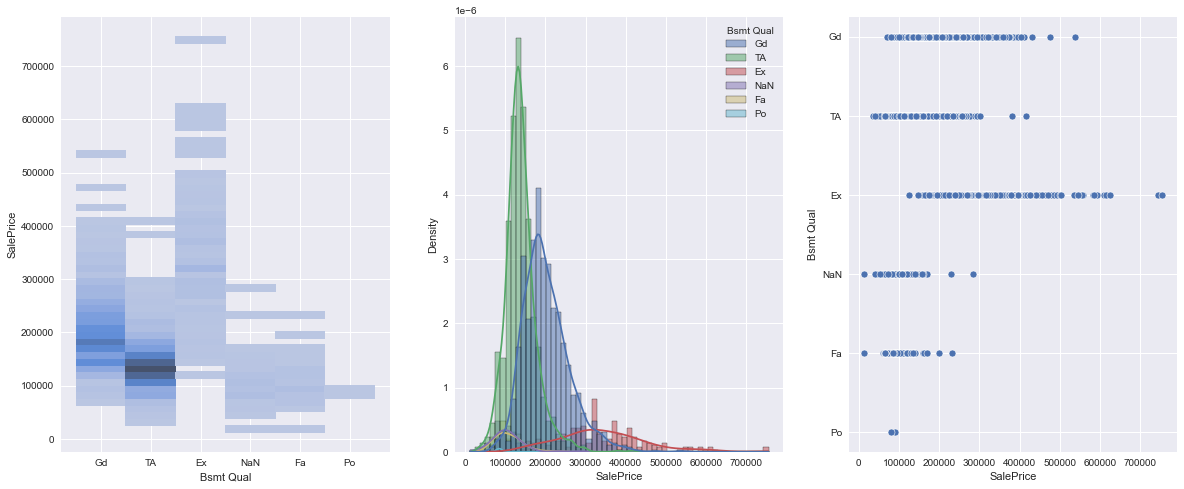

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
sns.histplot(x=x_train[best_col], y=y_train, discrete=(True, False), stat='density', ax=ax[0])
sns.histplot(x=y_train, hue=x_train[best_col], discrete=False, kde=True, stat='density', ax=ax[1])
sns.scatterplot(x=y_train, y=x_train[best_col], ax=ax[2])
plt.show()
ax = fig = None

### Question 1.4
Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear
Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default
parameters. Does scaling the data (within the pipeline) with StandardScaler help?

In [9]:
%%capture
categorical = x_train.dtypes == object
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical))
result = {}
for model in models:
    pipe1 = make_pipeline(trans,  eval(model + '()'))
    pipe2 = make_pipeline(scale_trans,  eval(model + '()'))
    result[model + ' not scaled'] = cross_val_score(pipe1, x_train, y_train, cv=3).mean()
    result[model + ' scaled'] = cross_val_score(pipe2, x_train, y_train, cv=3).mean()

In [10]:
pipe1 = pipe2 = categorical = scale_trans = trans = None
result

{'LinearRegression not scaled': 0.7889612250545156,
 'LinearRegression scaled': -0.002301275481896107,
 'Ridge not scaled': 0.8047169830617507,
 'Ridge scaled': 0.8516283140410335,
 'Lasso not scaled': 0.7906087695589168,
 'Lasso scaled': 0.8252848264439846,
 'ElasticNet not scaled': 0.6484090729495823,
 'ElasticNet scaled': 0.8283807558658053}

### Answer 1.4
As could be seen in the results above, scaling the data, using _StandardScaler_ indeed helps each of the regression models, except for the Linear Regression, to learn better. Morever, in the case of using an ElasticNet model, scaling the data seems to be a crucial step, as this makes the difference between an usable model to an unusable one.


### Question 1.5
Tune the parameters of the models using GridSearchCV. Do the results improve?
Visualize the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet.

In [11]:
%%capture
categorical = x_train.dtypes == object
scale_trans = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical))
models = ['Ridge', 'Lasso', 'ElasticNet']

parameters = {'model__alpha': np.array([10**-3, 5*10**-3, 10**-2, 5*10**-2, 1/10, 1/2, 10, 50, 100])}
result = {}
for model in models:
    pipe2 = Pipeline(steps=[('preprocess', scale_trans), ('model', eval(model + '()'))])
    if model == 'ElasticNet':
        parameters['model__l1_ratio'] = np.arange(0.1, 1, 0.1)
    result[model] = GridSearchCV(pipe2, param_grid=parameters, cv=4, return_train_score=True)
    result[model].fit(x_train, y_train)

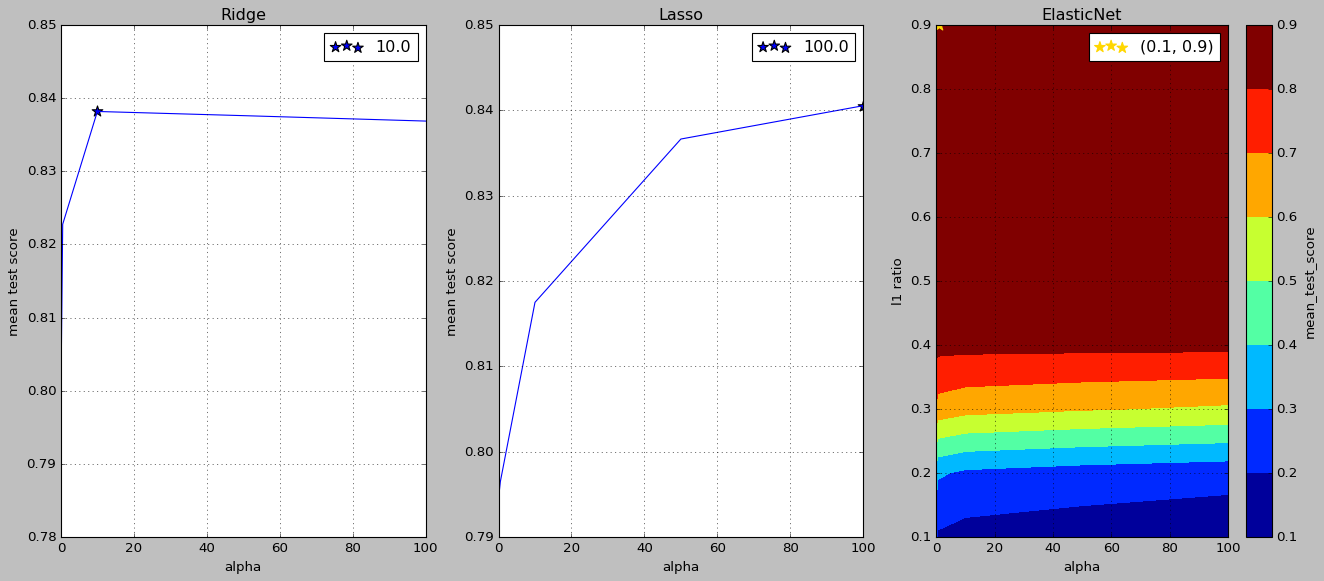

In [12]:
plt.style.use('classic')
fig, ax = plt.subplots(1, 3, figsize=(20,8), sharex=True)
for i, model in enumerate(models):
    ax[i].grid()
    ax[i].set_title(f'{model}')
    ax[i].set_xlabel('alpha')
    ax[i].set_ylabel('mean test score')
    if model == 'ElasticNet':
        ax[i].set_ylabel('l1 ratio')
        x = np.array([10**-3, 5*10**-3, 10**-2, 5*10**-2, 1/10, 1/2, 10, 50, 100])
        y = np.arange(0.1, 1, 0.1)
        x, y = np.meshgrid(x, y)
        z = result['ElasticNet'].cv_results_['mean_test_score']
        z = z.reshape((len(x), len(y)))[::-1, ::-1]
        c = ax[i].contourf(x, y, z, vmin=result['ElasticNet'].cv_results_['mean_test_score'].min(), vmax=result['ElasticNet'].cv_results_['mean_test_score'].max())
        plt.colorbar(c, ax=ax[i], label='mean_test_score')
        ax[i].scatter(result[model].best_params_['model__alpha']+1, result[model].best_params_['model__l1_ratio'] ,
                      label=f"({result[model].best_params_['model__alpha']}, {result[model].best_params_['model__l1_ratio']})", marker='*', s=100, color='gold')
        x = y = z = None
        ax[i].legend()
        continue
        
    ax[i].plot([10**-3, 5*10**-3, 10**-2, 5*10**-2, 1/10, 1/2, 10, 50, 100], result[model].cv_results_['mean_test_score'])
    ax[i].scatter(result[model].best_params_['model__alpha'], result[model].best_score_ ,label=f"{result[model].best_params_['model__alpha']}", marker='*', s=100)
    
    ax[i].legend()
plt.show()
ax = None

In [14]:
print('Best Ridge Parameters =', result['Ridge'].best_params_)
print('Best Lasso Parameters =', result['Lasso'].best_params_)
print('Best ElasticNet Parameters =', result['ElasticNet'].best_params_)

Best Ridge Parameters = {'model__alpha': 10.0}
Best Lasso Parameters = {'model__alpha': 100.0}
Best ElasticNet Parameters = {'model__alpha': 0.1, 'model__l1_ratio': 0.9}


In [13]:
print('Best Ridge Score =', result['Ridge'].best_score_)
print('Best Lasso Score =', result['Lasso'].best_score_)
print('Best ElasticNet Score =', result['ElasticNet'].best_score_)

Best Ridge Score = 0.8381784020362764
Best Lasso Score = 0.8405423079058963
Best ElasticNet Score = 0.8382176461960908


#### Answer 1.5
Comparing to the results in 1.4, we could say confidently that the results improved indeed.

### Question 1.6
Visualize the coefficients of the resulting models. Do they agree on which features are
important?

In [15]:
%%capture
categorical = x_train.dtypes == object
scale_trans = make_column_transformer((StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical))
models = [Pipeline(steps=[('preprocess', scale_trans), ('model', Ridge(alpha=10.0))]).fit(x_train, y_train), 
         Pipeline(steps=[('preprocess', scale_trans), ('model', Lasso(alpha=100.0))]).fit(x_train, y_train),
         Pipeline(steps=[('preprocess', scale_trans), ('model', ElasticNet(alpha=0.1, l1_ratio=0.9))]).fit(x_train, y_train)]

Let's have a look on the test results:

In [16]:
print('Ridge Result =', models[0].score(x_test, y_test))
print('Lasso Result =', models[1].score(x_test, y_test))
print('ElasticNet Result =', models[2].score(x_test, y_test))

Ridge Result = 0.9102901200893909
Lasso Result = 0.9169955418632456
ElasticNet Result = 0.9113478512156151


In [17]:
results = []
for model in models:
    coef = model.steps[1][1].coef_
    results.append({})
    for i, col in enumerate(df.columns):
        if categorical.loc[col]:
            to_append = np.mean(coef[i:len(df[col].unique())+i])
            results[-1][col] = to_append
        else:
            results[-1][col] = coef[i]

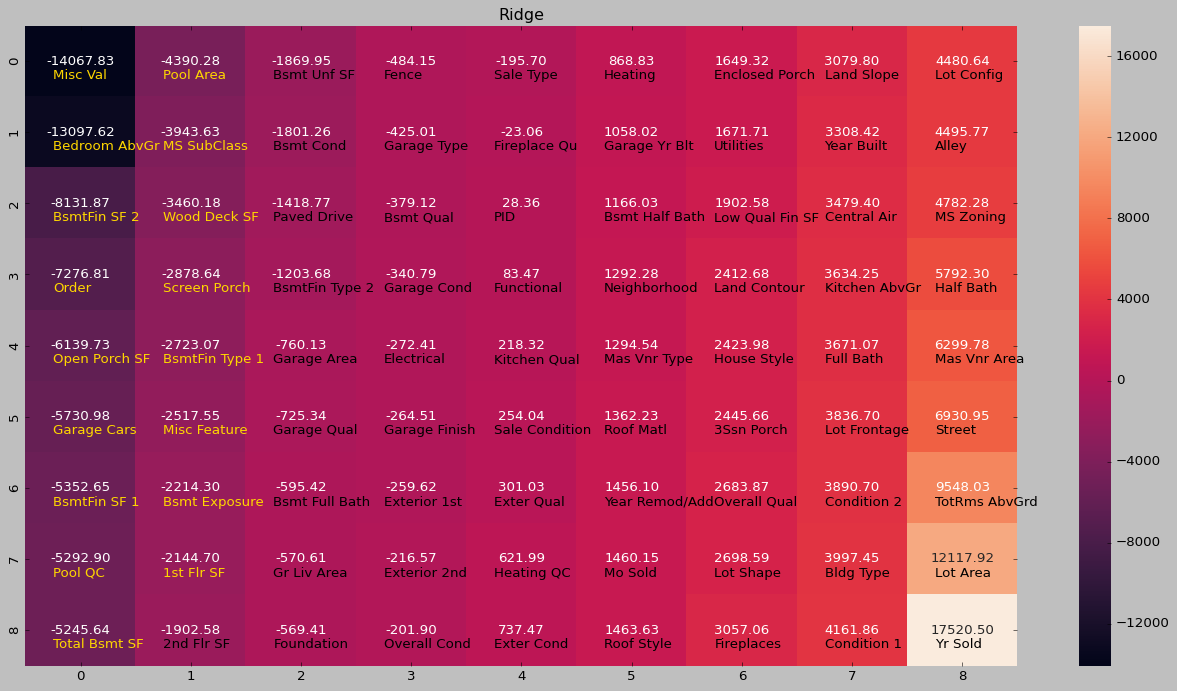

In [24]:
plt.figure(figsize=(20 ,10))
plt.xticks([])
plt.yticks([])
y = np.array(list(results[0].values()))
x = np.array(list(results[0].keys()), dtype=object)
x = x[y.argsort()]
y.sort()
y = y.reshape(9, 9)
x = x.reshape(9, 9)
sns.heatmap(y.T, annot=True, fmt=".2f").set_title("Ridge")
for i in range(9):
    for j in range(9):
        c = 'k'
        if y[i, j] < -2000:
            c = 'gold'
        plt.text(i + 1/4, j + 0.75, x[i, j], size=12, c=c)
plt.show()

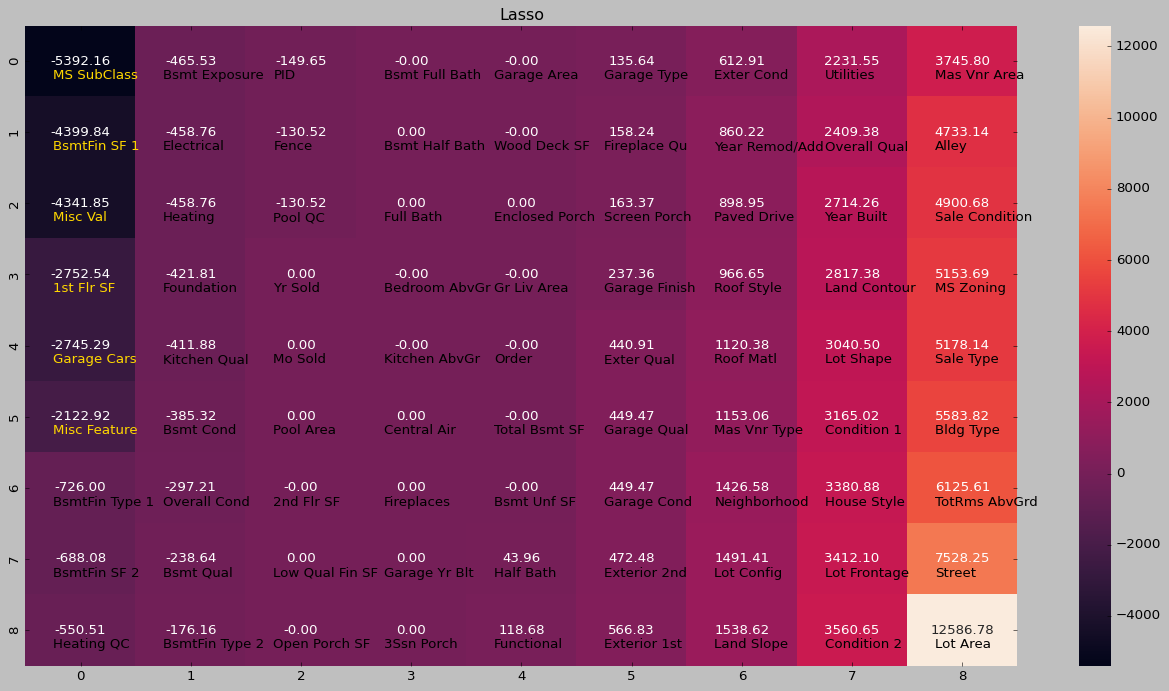

In [22]:
plt.figure(figsize=(20 ,10))
plt.xticks([])
plt.yticks([])
y = np.array(list(results[1].values()))
x = np.array(list(results[1].keys()), dtype=object)
x = x[y.argsort()]
y.sort()
y = y.reshape(9, 9)
x = x.reshape(9, 9)
sns.heatmap(y.T, annot=True, fmt=".2f").set_title("Lasso")
for i in range(9):
    for j in range(9):
        c = 'k'
        if y[i, j] < -2000:
            c = 'gold'
        plt.text(i + 1/4, j + 0.75, x[i, j], size=12, c=c)
plt.show()

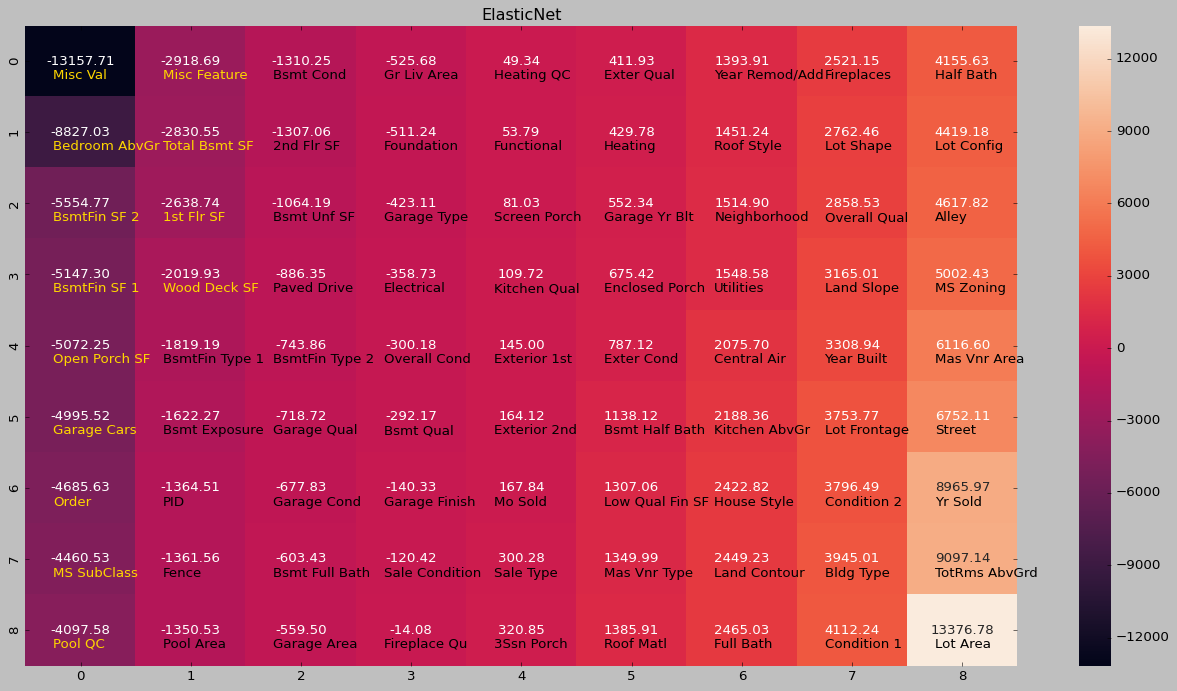

In [23]:
plt.figure(figsize=(20 ,10))
y = np.array(list(results[2].values()))
x = np.array(list(results[2].keys()), dtype=object)
x = x[y.argsort()]
y.sort()
plt.xticks([])
plt.yticks([])
y = y.reshape(9, 9)
x = x.reshape(9, 9)
sns.heatmap(y.T, annot=True, fmt=".2f").set_title("ElasticNet")
for i in range(9):
    for j in range(9):
        c = 'k'
        if y[i, j] < -2000:
            c = 'gold'
        plt.text(i + 1/4, j + 0.75, x[i, j], size=12, c=c)
plt.show()

In [29]:
result = results = None
model = models = coef = categorical = None

#### Answer 1.6
The three models are agreeing, in some level, about which of the features are important, but not about the order of importance, nor about **HOW** important those features are.


## Task 2 Classification on the Telco-churn dataset (40 points)

You can download the dataset and see it’s description at <br>
https://www.kaggle.com/blastchar/telco-customer-churn

### Question 2.1

Load the data from the file into a DataFrame

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
print(df.shape)

(2930, 81)


### Question 2.2

Split data into training and test set. Build a pipeline for dealing with categorical variables.
Evaluate Logistic Regression and nearest centroids using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?

In [4]:
target = df['Churn']
_df = df.drop(columns=['Churn'])
x_train, x_test, y_train, y_test = train_test_split(_df, target, test_size=0.3)
_df = None

In [5]:
%%capture
categorical = x_train.dtypes == object
models = ['LogisticRegression', 'NearestCentroid']
scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categorical))
result = {}
for model in models:
    pipe1 = make_pipeline(trans,  eval(model + '()'))
    pipe2 = make_pipeline(scale_trans,  eval(model + '()'))
    result[model + ' not scaled'] = cross_val_score(pipe1, x_train, y_train, cv=6).mean()
    result[model + ' scaled'] = cross_val_score(pipe2, x_train, y_train, cv=6).mean()

In [6]:
result

{'LogisticRegression not scaled': 0.7847888407802879,
 'LogisticRegression scaled': 0.8014206361201749,
 'NearestCentroid not scaled': 0.700607679792313,
 'NearestCentroid scaled': 0.7229216244703855}

#### Answer 2.2
As could be seen above, scaling the continuous features, with _StandardScaler_ , doesn't make such a big difference, and yet enhances the results. However, the _Logistic Regression_ "naive" model seems to be way better than the _Nearest Centroid_ "naive" model.

### Question 2.3

Tune the parameters using GridSearchCV. Do the results improve?

In [7]:
%%capture
categorical = x_train.dtypes == object
models = ['LogisticRegression', 'NearestCentroid']

scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
parameters = {'LogisticRegression':{'model__penalty' : ['l2', 'none'], 'model__C' : np.logspace(-4, 4, 20), 
                                   'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}, 
             
              'NearestCentroid': {'model__metric' : ['euclidean', 'manhattan', 'chebyshev', 'seuclidean'], 
                                 'model__shrink_threshold': [0.01, 0.1, 0.15, 0.2, 0.3, 0.4, None]}}
result = {}
for model in models:
    pipe2 = Pipeline(steps=[('preprocess', scale_trans), ('model', eval(model + '()'))])
    result[model] = GridSearchCV(pipe2, param_grid=parameters[model], cv=4, return_train_score=True)
    result[model].fit(x_train, y_train)

In [8]:
print(result['NearestCentroid'].best_score_)
result['NearestCentroid'].best_params_

0.7235309297353092


{'model__metric': 'euclidean', 'model__shrink_threshold': None}

In [9]:
print(result['LogisticRegression'].best_score_)
result['LogisticRegression'].best_params_

0.8010180335682161


{'model__C': 0.03359818286283781,
 'model__penalty': 'l2',
 'model__solver': 'saga'}

#### Answer 2.3
It doesn't seem like there's much a differece between the models performances, before and after the grid search. In fact, in the case of the _Nearest Centroid_ model, there is no difference at all, although the _Logistic Regression_ has changed slightly (if I might guess, it happens due to problematic numerical stability).

### Question 2.4

Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [10]:
from sklearn.model_selection import KFold

**K-FOLD with Shuffling:**

In [13]:
%%capture
categorical = x_train.dtypes == object
models = ['LogisticRegression', 'NearestCentroid']

scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
parameters = {'LogisticRegression':{'model__penalty' : ['l2', 'none'], 'model__C' : np.logspace(-4, 4, 20), 
                                   'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}, 
             
              'NearestCentroid': {'model__metric' : ['euclidean', 'manhattan', 'chebyshev', 'seuclidean'], 
                                 'model__shrink_threshold': [0.01, 0.1, 0.15, 0.2, 0.3, 0.4, None]}}
result = {}
for model in models:
    pipe2 = Pipeline(steps=[('preprocess', scale_trans), ('model', eval(model + '()'))])
    result[model] = GridSearchCV(pipe2, param_grid=parameters[model], cv=KFold(n_splits=5, shuffle=True), return_train_score=True)
    result[model].fit(x_train, y_train)

In [14]:
print(result['NearestCentroid'].best_score_)
result['NearestCentroid'].best_params_

0.7227180527383366


{'model__metric': 'euclidean', 'model__shrink_threshold': None}

In [15]:
print(result['LogisticRegression'].best_score_)
result['LogisticRegression'].best_params_

0.8030425963488843


{'model__C': 206.913808111479,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

**K-FOLD** with Shuffling and a given **Random Seed**:

In [17]:
%%capture
categorical = x_train.dtypes == object
models = ['LogisticRegression', 'NearestCentroid']

scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
parameters = {'LogisticRegression':{'model__penalty' : ['l2', 'none'], 'model__C' : np.logspace(-4, 4, 20), 
                                   'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}, 
             
              'NearestCentroid': {'model__metric' : ['euclidean', 'manhattan', 'chebyshev', 'seuclidean'], 
                                 'model__shrink_threshold': [0.01, 0.1, 0.15, 0.2, 0.3, 0.4, None]}}
result = {}
for model in models:
    pipe2 = Pipeline(steps=[('preprocess', scale_trans), ('model', eval(model + '()'))])
    result[model] = GridSearchCV(pipe2, param_grid=parameters[model], cv=KFold(n_splits=5, shuffle=True, random_state=0), return_train_score=True)
    result[model].fit(x_train, y_train)

In [18]:
print(result['NearestCentroid'].best_score_)
result['NearestCentroid'].best_params_

0.7233265720081137


{'model__metric': 'euclidean', 'model__shrink_threshold': None}

In [19]:
print(result['LogisticRegression'].best_score_)
result['LogisticRegression'].best_params_

0.8030425963488843


{'model__C': 11.288378916846883,
 'model__penalty': 'l2',
 'model__solver': 'newton-cg'}

Lets **Split** the data with a random state:

In [20]:
target = df['Churn']
_df = df.drop(columns=['Churn'])
x_train, x_test, y_train, y_test = train_test_split(_df, target, test_size=0.3, random_state=42)
_df = None

Now check out the results without **K-Fold**:

In [21]:
%%capture
categorical = x_train.dtypes == object
models = ['LogisticRegression', 'NearestCentroid']

scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
parameters = {'LogisticRegression':{'model__penalty' : ['l2', 'none'], 'model__C' : np.logspace(-4, 4, 20), 
                                   'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}, 
             
              'NearestCentroid': {'model__metric' : ['euclidean', 'manhattan', 'chebyshev', 'seuclidean'], 
                                 'model__shrink_threshold': [0.01, 0.1, 0.15, 0.2, 0.3, 0.4, None]}}
result = {}
for model in models:
    pipe2 = Pipeline(steps=[('preprocess', scale_trans), ('model', eval(model + '()'))])
    result[model] = GridSearchCV(pipe2, param_grid=parameters[model], cv=4, return_train_score=True)
    result[model].fit(x_train, y_train)

In [22]:
print(result['NearestCentroid'].best_score_)
result['NearestCentroid'].best_params_

0.7156194373347657


{'model__metric': 'euclidean', 'model__shrink_threshold': None}

In [23]:
print(result['LogisticRegression'].best_score_)
result['LogisticRegression'].best_params_

0.8044616195847948


{'model__C': 0.012742749857031334,
 'model__penalty': 'l2',
 'model__solver': 'saga'}

And with **K-Fold**:

In [24]:
%%capture
categorical = x_train.dtypes == object
models = ['LogisticRegression', 'NearestCentroid']

scale_trans = make_column_transformer( (StandardScaler(), ~categorical), (OneHotEncoder(handle_unknown='ignore'), categorical) )
parameters = {'LogisticRegression':{'model__penalty' : ['l2', 'none'], 'model__C' : np.logspace(-4, 4, 20), 
                                   'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}, 
             
              'NearestCentroid': {'model__metric' : ['euclidean', 'manhattan', 'chebyshev', 'seuclidean'], 
                                 'model__shrink_threshold': [0.01, 0.1, 0.15, 0.2, 0.3, 0.4, None]}}
result = {}
for model in models:
    pipe2 = Pipeline(steps=[('preprocess', scale_trans), ('model', eval(model + '()'))])
    result[model] = GridSearchCV(pipe2, param_grid=parameters[model], cv=KFold(n_splits=5, shuffle=True), return_train_score=True)
    result[model].fit(x_train, y_train)

In [25]:
print(result['NearestCentroid'].best_score_)
result['NearestCentroid'].best_params_

0.714604462474645


{'model__metric': 'euclidean', 'model__shrink_threshold': None}

In [26]:
print(result['LogisticRegression'].best_score_)
result['LogisticRegression'].best_params_

0.8024340770791076


{'model__C': 0.012742749857031334,
 'model__penalty': 'l2',
 'model__solver': 'newton-cg'}

### Answer 2.4
1. The _Nearest Centroid_ model's parameters never change, as the model itself keeps to deliver awful results no matter the conditions.
2. The _Logistic Regression_ 's parameters actually change with the change of cross validation strat' or the train-test split conditions. Keeping that in mind, and we might even be able to improve the performance of the model.

Good Luck!